### Artificial Intelligence

##### Using any CSP (Constraint Satisfaction Problem) framework (using variables, value domains, and constraints), discover if the above problems can be solved and if so detail who would be in hired.

In [2]:
pip install python-constraint

Note: you may need to restart the kernel to use updated packages.


In [3]:
from constraint import Problem, AllDifferentConstraint

# Defines the "employees" variable
employees = ["Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]
# Defines the "roles" dictionary which assigns roles to the employees
roles = {
    "Peter": ["Python Programmer", "AI Engineer"],
    "Juan": ["Web Designer", "AI Engineer"],
    "Jim": ["AI Engineer", "Systems Engineer"],
    "Jane": ["Python Programmer", "Database Engineer"],
    "Mary": ["Web Designer", "Systems Engineer"],
    "Bruce": ["Systems Engineer", "Python Programmer"],
    "Anita": ["Web Designer", "AI Engineer"]
}

# Defines the number employees for each role
# Scenario 1 doesn't need a employee who knows Python, 3 employees can be hired
scenario1 = {"Python Programmer": 0, "AI Engineer": 1, "Web Designer": 1, "Database Admin": 1, "Systems Engineer": 0}
# Scenario 2 can hire 4 more employees
scenario2 = {"Python Programmer": 1, "AI Engineer": 3, "Web Designer": 1, "Database Admin": 1, "Systems Engineer": 1}

# Checks if the employee is a potential hire according to its role
def potentialhires(person, role):
    return all(role in roles[person] for role in role.split())

# Defines the constraints for each role
def constraints(problem, role, count):
    for person in employees:
        if potentialhires(person, role):
            problem.addVariable(person, [role])

# Solves the problem and finds a solution which can be applied to each scenario
def solve(roles, jobsavailable):
    problem = Problem()

    for role, count in roles.items():
        constraints(problem, role, count)

    return problem.getSolutions()

if __name__ == "__main__":
    # Solution for scenario 1
    print("Scenario 1:")
    solution_scenario1 = solve(scenario1, jobsavailable=3)
    print(solution_scenario1)

    # Solution for scenario 2
    print("Scenario 2:")
    solution_scenario2 = solve(scenario2, jobsavailable=4)
    print(solution_scenario2)

Scenario 1:
[]
Scenario 2:
[]


##### These problems be solved using several other algorithm’s we have studied in the module. Choose one of these algorithms and discuss your answer in detail including a proof of your hypothesis in code.

In [4]:
import heapq

In [5]:
# Defines a function for Dijkstra's algorithm
def dijkstra(graph, start):
    # Sets all nodes to infinity
    distances = {node: float('infinity') for node in graph}
    # Set the starting node to 0
    distances[start] = 0
    # Creates a priority queue
    priorityQueue = [(0, start)]

    # Defines a while loop
    while priorityQueue:
        # Pops the node with the smallest distance from the priority queue
        currentDistance, currentNode = heapq.heappop(priorityQueue)

        # Checks if the current distance is greater than the previous distance
        if currentDistance > distances[currentNode]:
            continue

        # Updates the distance for the neighbour nodes
        for neighbor, weight in graph[currentNode].items():
            # Calculates the distance from the starting node to the neighbour
            distance = currentDistance + weight

            # Updates if the current distance is smaller than the previous distance
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                # Pushes the updated distance and neighbor to the priority queue
                heapq.heappush(priorityQueue, (distance, neighbor))

    return distances

# Defines a function for hiring employees
def hireEmployees(graph, startNode, abilitiesNeeded, funds):
    # Runs the algorithm to calculate the distances
    distances = dijkstra(graph, startNode)

    # Sorts employees by their distances
    sortedEmployees = sorted(distances.items(), key=lambda x: x[1])

    # Initializes variables for selected employees and remaining funds
    hiredEmployees = []
    remainingFunds = funds

    # Defines a for loop
    for employee, distance in sortedEmployees:
        abilities = graph[employee].keys()
        # Checks if the abilities and funds constraints are met
        if all(ability in abilitiesNeeded for ability in abilities) and remainingFunds > 0:
            # Adds the employee to the selected list and decrement the funds
            hiredEmployees.append(employee)
            remainingFunds -= 1

    return hiredEmployees

# Defines the graph representing employee abilities
graph = {
    'Ciara': {},
    'Peter': {'Python': 1, 'AI': 1},
    'Juan': {'Web': 1, 'AI': 1},
    'Jim': {'AI': 1, 'Systems': 1},
    'Jane': {'Python': 1, 'Database': 1},
    'Mary': {'Web': 1, 'Systems': 1},
    'Bruce': {'Systems': 1, 'Python': 1},
    'Anita': {'Web': 1, 'AI': 1},
}

# Solution for scenario 1
abilitiesNeededScenario1 = {'Python': 2, 'AI': 2, 'Web': 1, 'Database': 1, 'Systems': 1}
fundsScenario1 = 3
selectedEmployeesScenario1 = hireEmployees(graph, 'Ciara', abilitiesNeededScenario1, fundsScenario1)
print("Scenario 1: Selected Employees -", selectedEmployeesScenario1)

# Solution for scenario 2
abilitiesNeededScenario2 = {'Python': 2, 'AI': 3, 'Web': 1, 'Database': 1, 'Systems': 1}
fundsScenario2 = 4
selectedEmployeesScenario2 = hireEmployees(graph, 'Ciara', abilitiesNeededScenario2, fundsScenario2)
print("Scenario 2: Selected Employees -", selectedEmployeesScenario2)

Scenario 1: Selected Employees - ['Ciara', 'Peter', 'Juan']
Scenario 2: Selected Employees - ['Ciara', 'Peter', 'Juan', 'Jim']


### Data Visualisation & Communication

##### Use appropriate visualisations to help communicate the CSP scenario and the corresponding solutions, if any, to the appropriate stakeholders.
##### Create interactive visualisation(s) to allow a user to explore alternate constraint scenarios.
##### Create GUI(s) to allow a user to explore alternate constraint scenarios.


In [6]:
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

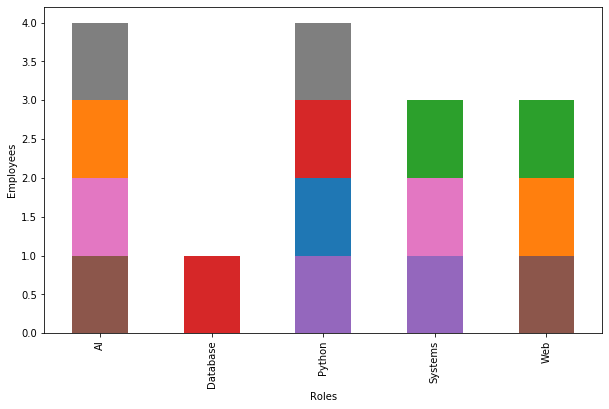

In [8]:
# Creates a dataframe to store the data
df = pd.DataFrame(columns=["Employee", "Role"])

# Creates a dictionary to store role assignments
roles_assignment = {'AI': ['Juan', 'Peter', 'Jim', 'Anita'],
                    'Python': ['Ciara', 'Peter', 'Jane', 'Bruce'],
                    'Web': ['Juan', 'Mary', 'Anita'],
                    'Systems': ['Jim', 'Mary', 'Bruce'],
                    'Database': ['Jane']}

# Creates a list to store the employees
person_names = ['Ciara', 'Juan', 'Mary', 'Jane', 'Bruce', 'Anita', 'Jim', 'Peter']

# Creates the main tkinter window
root = tk.Tk()
root.title("Constraint Satisfaction Problem Visualization")

# Creates the frame to store the matplotlib chart
chart_frame = ttk.Frame(root)
chart_frame.grid(row=0, column=0, rowspan=2, padx=10, pady=10)

# Creates the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))
canvas = FigureCanvasTkAgg(fig, master=chart_frame)
canvas.get_tk_widget().pack()

# Defines a function to update the matplotlib chart
def update_chart():
    try:
        # Clears the previous chart
        ax.clear()

        # Updates the dictionary
        total_people = person_entry.get()

        # Checks if the input is an integer
        if total_people.isdigit():
            total_people = int(total_people)

            # Checks if the input is within the range
            if 1 <= total_people <= 8:
                global df
                df = pd.DataFrame(columns=["Employee", "Role"])

                # Assigns the roles to each person
                role_preferences = ['AI', 'Python', 'Web', 'Systems', 'Database']
                for person_name in person_names[:total_people]:
                    for role in role_preferences:
                        if person_name in roles_assignment[role]:
                            new_data = pd.DataFrame({"Employee": [person_name], "Role": [role]})
                            df = pd.concat([df, new_data], ignore_index=True)

                # Updates the chart
                role_counts = df.groupby('Role')['Employee'].count().sort_index()
                stacked_data = df.pivot_table(index='Role', columns='Employee', aggfunc=len, fill_value=0)

                # Plots the chart with matching colors for names
                color_map = {person: to_hex(plt.cm.tab10(i)) for i, person in enumerate(person_names[:total_people])}
                stacked_data.plot(kind='bar', stacked=True, ax=ax, legend=False, color=[color_map[col] for col in stacked_data.columns])

                # Sets title and labels
                ax.set_xlabel('Roles')
                ax.set_ylabel('Employees')

                # Sets positions and labels
                ax.set_xticks(range(len(role_counts)))
                ax.set_xticklabels(role_counts.index)

                # Draws the chart
                canvas.draw()

                # Displays the names and colors on the side
                legend_frame = ttk.Frame(root)
                legend_frame.grid(row=0, column=1)

                for i, person in enumerate(person_names[:total_people]):
                    color = color_map[person]
                    label = ttk.Label(legend_frame, text=person, background=color)
                    label.grid(row=i, column=0, padx=5, pady=5, sticky='w')

    except ValueError:
        messagebox.showerror("Error", "Please enter a valid total number of people")

# Defines the label and input field for the number of people
person_label = ttk.Label(root, text="Enter the number of people here:")
person_entry = ttk.Entry(root)
person_entry.insert(0, "8")
person_label.grid(row=2, column=0)
person_entry.grid(row=2, column=1)

# Defines the button
update_button = ttk.Button(root, text="Update", command=update_chart)
update_button.grid(row=3, column=0, columnspan=2, pady=10)

# Runs the tkinter loop
root.mainloop()